In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import tensorflow as tf                              # tensorflow 기본 import
from tensorflow.keras.models import Sequential       # model box 구성
from tensorflow.keras.layers import Flatten, Dense # model 안의 input layer와
                                                      # output layer를 구성
from tensorflow.keras.optimizers import Adam         # 알고리즘 담당
import sklearn
from sklearn.model_selection import train_test_split # train Data, Test Data 분리
from sklearn.preprocessing import MinMaxScaler, StandardScaler       # 데이터 정규화
                                                      # 컴퓨터가 큰숫자를 작은숫자로 변경
                                                      # 0~1사이 실수 값으로 변경

In [3]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df = df.dropna()
df.shape

(768, 9)

In [5]:
cols = df.keys()
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.shape

(768, 9)

In [7]:
# 독립변수와 종속변수를 분리해야 해요.
x_data = df.drop('Outcome', axis=1, inplace=False)  # 2 차원 협태의 pixel(28 * 28)
y_data = df['Outcome']    # 1차원

In [8]:
x_data.shape

(768, 8)

In [9]:
y_data.shape

(768,)

In [10]:
# pixel data(x_data) 를 정규화(0~1사이의 실수값으로 변화)

# scaler = MinMaxScaler()
scaler = StandardScaler()
scaler.fit(x_data)        # scaler를 학습시키고 - min, max
norm_x_data = scaler.transform(x_data)  # scaler 를 통해서 실제로 값을 변환(0 ~ 1 변경)

In [11]:
norm_x_data.shape

(768, 8)

In [12]:
from sklearn.utils import shuffle 
norm_x_data = shuffle(norm_x_data)

In [13]:
norm_x_data

array([[-0.54791859, -0.02799627, -0.78091875, ..., -0.6590381 ,
        -0.05096844, -0.53102292],
       [ 0.3429808 ,  0.03459802,  0.87340925, ...,  0.34362394,
        -0.54928802, -0.0204964 ],
       [ 1.23388019,  1.44296956,  1.90736425, ...,  0.71168975,
        -0.92680285,  0.83038113],
       ...,
       [-1.14185152,  1.84983245,  0.45982725, ...,  3.4785293 ,
         5.88356477, -0.70119842],
       [-1.14185152, -1.4989621 , -3.57259724, ..., -1.3824778 ,
        -0.39224185, -0.70119842],
       [ 0.04601433,  0.7857295 ,  0.45982725, ...,  0.82591707,
         0.14533928,  2.87248721]])

In [14]:
model = Sequential()    # model 생성

model.add(Flatten(input_shape=(8,)))     # 모델 box에 input layer 추가
model.add(Dense(64, activation="tanh")) 
model.add(Dense(128, activation="tanh")) 
model.add(Dense(64, activation="tanh")) 
model.add(Dense(32, activation="relu")) 
model.add(Dense(1, activation="sigmoid")) # 모델 box에 output layer 추가
                                                  # activation은 확률을 알아내기 위해 각 노드가 수행하는 수학적 연산.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19265 (75.25 KB)
Trainable params: 19265 (

In [16]:
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="mse",
              metrics=["accuracy"]
             )

In [17]:
hist = model.fit(norm_x_data,
          y_data,
          epochs=400,
          verbose=1,
          validation_split=0.2)

Epoch 1/400


20/20 [==============================] - 1s 14ms/step - loss: 0.2337 - accuracy: 0.6173 - val_loss: 0.2464 - val_accuracy: 0.6234
Epoch 2/400
20/20 [==============================] - 0s 4ms/step - loss: 0.2206 - accuracy: 0.6612 - val_loss: 0.2498 - val_accuracy: 0.5584
Epoch 3/400
20/20 [==============================] - 0s 4ms/step - loss: 0.2165 - accuracy: 0.6645 - val_loss: 0.2452 - val_accuracy: 0.6169
Epoch 4/400
20/20 [==============================] - 0s 4ms/step - loss: 0.2158 - accuracy: 0.6726 - val_loss: 0.2501 - val_accuracy: 0.5909
Epoch 5/400
20/20 [==============================] - 0s 4ms/step - loss: 0.2118 - accuracy: 0.6840 - val_loss: 0.2535 - val_accuracy: 0.5779
Epoch 6/400
20/20 [==============================] - 0s 4ms/step - loss: 0.2104 - accuracy: 0.6726 - val_loss: 0.2574 - val_accuracy: 0.5519
Epoch 7/400
20/20 [==============================] - 0s 4ms/step - loss: 0.2085 - accuracy: 0.6743 - val_loss: 0.2565 - val_accuracy: 0.5325
Epoch 8/40

20/20 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 0.8453 - val_loss: 0.3139 - val_accuracy: 0.5065
Epoch 56/400
20/20 [==============================] - 0s 4ms/step - loss: 0.1141 - accuracy: 0.8664 - val_loss: 0.3216 - val_accuracy: 0.5130
Epoch 57/400
20/20 [==============================] - 0s 4ms/step - loss: 0.1115 - accuracy: 0.8664 - val_loss: 0.3095 - val_accuracy: 0.5390
Epoch 58/400
20/20 [==============================] - 0s 4ms/step - loss: 0.1101 - accuracy: 0.8730 - val_loss: 0.3212 - val_accuracy: 0.5000
Epoch 59/400
20/20 [==============================] - 0s 4ms/step - loss: 0.1073 - accuracy: 0.8795 - val_loss: 0.3150 - val_accuracy: 0.5195
Epoch 60/400
20/20 [==============================] - 0s 4ms/step - loss: 0.1043 - accuracy: 0.8844 - val_loss: 0.3144 - val_accuracy: 0.5390
Epoch 61/400
20/20 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.8909 - val_loss: 0.3232 - val_accuracy: 0.5325
Epoch 62/400
20/20 

Epoch 113/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0266 - accuracy: 0.9837 - val_loss: 0.3605 - val_accuracy: 0.5130
Epoch 114/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9853 - val_loss: 0.3614 - val_accuracy: 0.5390
Epoch 115/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9837 - val_loss: 0.3580 - val_accuracy: 0.5325
Epoch 116/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9837 - val_loss: 0.3630 - val_accuracy: 0.5260
Epoch 117/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0229 - accuracy: 0.9870 - val_loss: 0.3682 - val_accuracy: 0.5065
Epoch 118/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9821 - val_loss: 0.3572 - val_accuracy: 0.5455
Epoch 119/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 0.9837 - val_loss: 0.3678 - val_accuracy: 0.5195

20/20 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 0.9951 - val_loss: 0.3892 - val_accuracy: 0.5455
Epoch 171/400
20/20 [==============================] - 0s 5ms/step - loss: 0.0070 - accuracy: 0.9951 - val_loss: 0.3936 - val_accuracy: 0.5260
Epoch 172/400
20/20 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 0.9935 - val_loss: 0.3905 - val_accuracy: 0.5325
Epoch 173/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.9951 - val_loss: 0.3932 - val_accuracy: 0.5325
Epoch 174/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.9935 - val_loss: 0.3920 - val_accuracy: 0.5260
Epoch 175/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9951 - val_loss: 0.3884 - val_accuracy: 0.5390
Epoch 176/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9951 - val_loss: 0.3929 - val_accuracy: 0.5325
Epoch 177/400

20/20 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 0.9821 - val_loss: 0.3866 - val_accuracy: 0.5455
Epoch 228/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.9870 - val_loss: 0.3931 - val_accuracy: 0.5390
Epoch 229/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 0.9902 - val_loss: 0.3868 - val_accuracy: 0.5584
Epoch 230/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9902 - val_loss: 0.3768 - val_accuracy: 0.5519
Epoch 231/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0126 - accuracy: 0.9853 - val_loss: 0.3779 - val_accuracy: 0.5714
Epoch 232/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 0.9853 - val_loss: 0.3704 - val_accuracy: 0.5584
Epoch 233/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 0.9837 - val_loss: 0.3813 - val_accuracy: 0.5714
Epoch 234/400

20/20 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9984 - val_loss: 0.3973 - val_accuracy: 0.5584
Epoch 285/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9984 - val_loss: 0.3959 - val_accuracy: 0.5584
Epoch 286/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9984 - val_loss: 0.3964 - val_accuracy: 0.5584
Epoch 287/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9984 - val_loss: 0.3965 - val_accuracy: 0.5649
Epoch 288/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9984 - val_loss: 0.3969 - val_accuracy: 0.5584
Epoch 289/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9984 - val_loss: 0.3966 - val_accuracy: 0.5584
Epoch 290/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9984 - val_loss: 0.3969 - val_accuracy: 0.5584
Epoch 291/400

20/20 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9984 - val_loss: 0.3986 - val_accuracy: 0.5649
Epoch 342/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9984 - val_loss: 0.3986 - val_accuracy: 0.5649
Epoch 343/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9984 - val_loss: 0.3987 - val_accuracy: 0.5649
Epoch 344/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9984 - val_loss: 0.3979 - val_accuracy: 0.5649
Epoch 345/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9984 - val_loss: 0.3985 - val_accuracy: 0.5649
Epoch 346/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9984 - val_loss: 0.3984 - val_accuracy: 0.5584
Epoch 347/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9984 - val_loss: 0.3987 - val_accuracy: 0.5649
Epoch 348/400

20/20 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9984 - val_loss: 0.4011 - val_accuracy: 0.5584
Epoch 399/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9984 - val_loss: 0.4017 - val_accuracy: 0.5584
Epoch 400/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9984 - val_loss: 0.4011 - val_accuracy: 0.5584


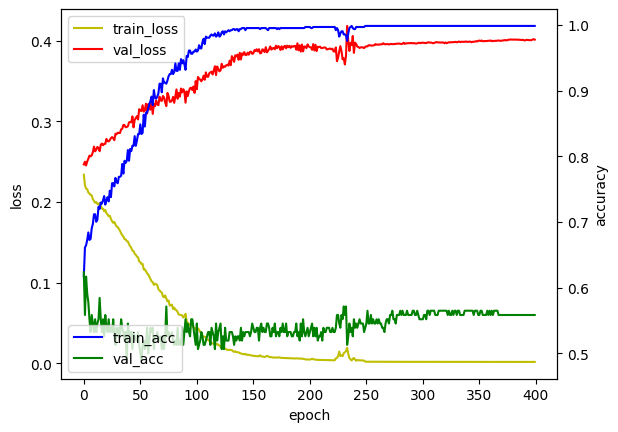

In [19]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")

In [20]:
pred_x_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50],
                        [1,  85, 66, 29, 0, 26.6, 0.351, 31]])
pred_x_data

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ]])

In [21]:
pred_x_data.shape

(2, 8)

In [22]:
model.predict(pred_x_data)

1/1 [==============================] - 0s 106ms/step


array([[0.0348646 ],
       [0.02799463]], dtype=float32)